# **Econometria: Fatores que impactam no nivel de renda**

FGV EPGE - Escola de Pós-Graduação em Economia
==
Trabalho de A2
--
Aluno: Diogo Sánchez, Giovanna Roncoli, Lucas Marques, Pedro Werneck, Valentina Araujo

# Introdução

Dadas as instruções para o trabalho de Econometria, o grupo decidiu analisar "Como a distância até o centro financeiro do país, o nível de escolaridade e a concentração de comércios e indústrias influenciam nos diferentes níveis de renda per capita apresentados pelos municípios brasileiros?". Assim, temos claro o caminho a ser percorrido ao longo do documento, no qual buscaremos entender como a renda per capita - nossa variável independente - é afetada pelos fatores acima citados, os quais representam nossas variáves explicativas. 

In [ ]:

from statsmodels.formula.api import ols, probit,logit    # Modelos de regressão

import statsmodels.api as sm            # Modelos de regressão
import scipy.stats as stats             # Estatistica em geral
from sklearn.model_selection import train_test_split                # Cortando pra modelagem
from sklearn.linear_model import LogisticRegression                 # LOGIT
from sklearn.metrics import classification_report, confusion_matrix # Visualização pro logit e probit

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF # Teste de Multicolinearidade

import seaborn as sns                   # Gráficos
import matplotlib.pyplot as plt         # Gráficos
import matplotlib.ticker as ticker      # Gráficos
import matplotlib.gridspec as gridspec  # Gráficos


import numpy as np  # Manipulação e operações
import pandas as pd # Manipulações de dataframes

from IPython.display import clear_output, display # Otimização de Output das células


import os # Navegação de arquivos

import copy #Melhorar o python

clear_output(wait=True) # Limpar o output dos imports utilizados

# Motivação

A renda per capita é um importante indicador para avaliar a situação econômica de um país, uma vez que indica a média do Produto Nacional Bruto pelo número de habitantes. Dessa forma, ao granularizarmos tal parâmetro para entender os diferentes níveis apresentados pelos municípios brasileiros, estamos tratando da distribuição de renda do território nacional. 

Durante o período pandêmico, tivemos, conforme dados do IBGE, a maior redução do índice de Gini já registrada na história, indicando uma redução da desigualdade econômica no Brasil motivada pela criação do Auxílio Emergencial por parte do Governo Federal. Esse feito trouxe o tema ainda mais à tona, incitando nossa análise e sendo o tema central da mesma.

Ainda, é sabido que a pandemia do Covid-19 afetou o nível de escolaridade da população brasileira, especialmente a parcela dependente da educação pública, que não teve estrutura suficiente para prosseguir com o ensino à distância. Para mais, com a crise econômica que foi desencadeada pelo regime de lockdown, diversos comércios e indústrias foram fechados, prejudicando a criação de empregos e modificando a dinâmica de diversas regiões do país. Dessa forma, optamos por também incluir tais variáveis em nosso estudo, de maneira a utilizá-las para explicar as variações dos níveis de renda per capita.

# Literatura

É possível perceber que o uso de modelos gravitacionais se tornou uma prática bastante utilizada em aplicações econométricas. Nesse sentido, um modelo gravitacional nada mais é do que um modelo que prevê o fluxo de comércio entre duas unidades (países, cidades, estados etc.) baseado em seus tamanhos econômicos e na distância entre essas duas unidades. Sendo assim, a seguir iremos resumir três artigos que fazem uso desse tipo de modelo.


*   O primeiro artigo é de autoria de Antonio Carlos Cipriani Dal Pizzol e busca 
estimar o volume de comércio bilateral entre países do BRICs, para isso foram utilizadas algumas previsões feitas pela Goldman Sachs que detalharam valores do PIB e da renda per capita dos BRICs até 2050. Portanto, fez-se uso de uma regressão na qual a variável dependente representou o tamanho (em termos de fluxo) do comércio entre os países. Além disso, foram usadas variáveis independentes comuns a esse tipo de modelo, tamanho dos PIBs e renda per capita, **distância geográfica**, variáveis dummies relacionadas a adjacência entre os países etc., e as amostras de dados foram separadas para que se pudesse realizar estimativas de curto, médio e longo prazo.
O artigo então, estima os coeficientes usando o método dos Mínimos Quadrados Ordinários e os separa em dois grupos, primeiramente só são mantidos os coeficientes que apresentam nível de significância maior do que 90%, e em um segundo momento estimou-se o modelo como um todo, mantendo até mesmo os coeficientes que não apresentam relevância estatística. O autor mostra ainda que manter tais coeficientes não gerou melhora significativa no R2 do modelo, logo eles foram descartados. 
Por fim, o autor utiliza o método Tobit e verifica que seus coeficientes nos anos de 2006 e 2007 tornaram as estimativas muito próximas de realidade, assim esses coeficientes são os escolhidos para fazer as previsões. Uma das conclusões finais é de que ao admitirmos a equação gravitacional como medidora de potencial de comércio, temos a ideia de que os BRICs já possuem um nível satisfatório de comércio entre si.

* Um segundo trabalho relacionado a essa ideia de modelos gravitacionais foi publicado na Revista Brasileira de Estudos Regionais e Urbanos, esse paper usa aplicações econométricas para estimar o fluxo de migração entre os estados brasileiros. Faz-se uso de uma regressão na qual a variável dependente é o logaritmo do número de migrantes de uma região j que atualmente residem em uma região i. Além disso, usam-se fatores como: população da região de origem, população da região de destino, o custo bilateral da migração que esta ligado a distância entre regiões e as razões dos índices de violência, **acesso a estudo**, acesso a saúde, acesso a água entre as regiões i e j.
Após identificar os problemas de estimação (heterocedasticidade e correlação contemporânea) corrigiu-se por meio da estimação com Panel Corrected Standard Errors (PCSE). Como esperado, a migração esta positivamente relacionada como o tamanho da população de origem e de destino e negativamente relacionada com a distância entre origem e destino. Ademais, foi possível perceber uma relação positiva entre rendimentos superiores nas regiões de destino e fluxo migratório e uma relação negativa quando os rendimentos superiores se localizam nas regiões de origem.

* O último artigo que iremos citar possui uma ideia semelhante ao primeiro mencionado, os autores Claudir Olípio Gräf e André Filipe Zago de Azevedo buscaram analisar o fluxo comercial de países membros do MERCOSUL. Fez-se uso de um modelo gravitacional e utilizaram-se dados em painel pelo método de efeitos fixos e efeitos aleatórios. 
As variáveis independentes são muito parecidas com as do primeiro artigo, como PIB per capita entre os países e distância entre eles, porém existem algumas variáveis não usuais. Tal fato pode ser atribuído a existência de variáveis dummies que representam se os países i e j falam a mesma língua ou se pertencem a uma ilha por exemplo. 
A conclusão foi de que o método dos efeitos aleatórios apresentou um R2 maior do que o método dos efeitos fixos, mas isso não significa que possamos descartar um em detrimento do outro. Além disso foi constatado que o método de efeitos fixos mostrou, para o ano de 2009, que apenas o fluxo Argentina x Uruguai havia potencial de ser explorado, os demais fluxos já estavam apresentando volume de comércio acima do previsto no modelo. Ademais o método dos efeitos aleatórios mostrou um volume potencial de 3,47% ainda a ser explorado. 


# Dados

Para o inicio e desenvolvimento do trabalho, primeiro iremos falar sobre os dados utilizados, todos esses dados são do VNIP (Valdemar Neto Instituto de Pesquisa) e foram baixados atraves da plataforma [Dropbox](https://www.dropbox.com/scl/fo/uefp6fepo79adfhqoa31l/h?dl=0&preview=BASE_G2.xls&rlkey=qfrhzeayg4vxl0whfftghzv9c), na célula a baixo iremos importar o arquivo em um dataframe Pandas.

In [ ]:
#### Importando a base de dados (4)

# Abrindo o arquivo
base = pd.read_excel('BASE_G2.xlsx')

# Arrumando o id
base.set_index('id',inplace=True)

# Renomeando colunas
base.columns = ['Renda_per_capita','Distancia_SP','Media_anos_estudo','Capital_per_capita']



In [ ]:
## Análise descritiva (4.1)
# Utilizar a função round para diminuir as casas decimais // Utilizar a função describe para ter informações sobre a distribuição das variavei 
round( base.describe(),1)

,Renda_per_capita,Distancia_SP,Media_anos_estudo,Capital_per_capita
count,5500.0,5500.0,5500.0,5500.0
mean,1999.5,2100.0,10.0,55500.0
std,200.0,210.0,1.0,5550.0
min,1295.0,1346.1,6.3,32463.7
25%,1868.0,1958.5,9.3,51868.4
50%,1996.0,2100.3,10.0,55561.1
75%,2132.2,2239.2,10.7,59127.8
max,2678.0,2818.6,13.5,78651.2


Agora falando sobre os artigos estudados, foi possível observar a influência do modelo gravitacional sobre fluxos comerciais e migração de pessoas, de forma que fatores como tamanho do país, distância e qualidade de vida impactam a decisão dos indivíduos. A partir deste raciocínio, podemos elaborar o nosso modelo e estabelecer as variáveis que pesam sobre o nível de renda da população brasileira.






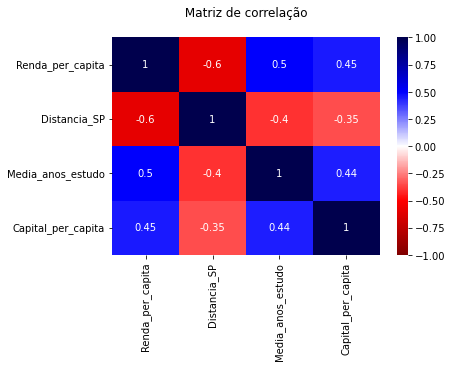

In [ ]:
## Matriz de Correlação (4.2)

# Correlation com valores
correlacao = base.corr()

# Plot com mapa de calor da matriz de correlacao 
sns.heatmap(correlacao,cmap='seismic_r',annot=True,vmin=-1,vmax=1) 

# Adicionar o titulo
plt.title(" Matriz de correlação \n")

# Output
clear_output(wait=True)
plt.show()

A seguir conseguimos analisar como é dado a relação entre as variaveis, além de sua correlação, qual seria o formato dessa relação. Ademais, também conseguimos observar a distribuição das variaveis que são parentemente normais

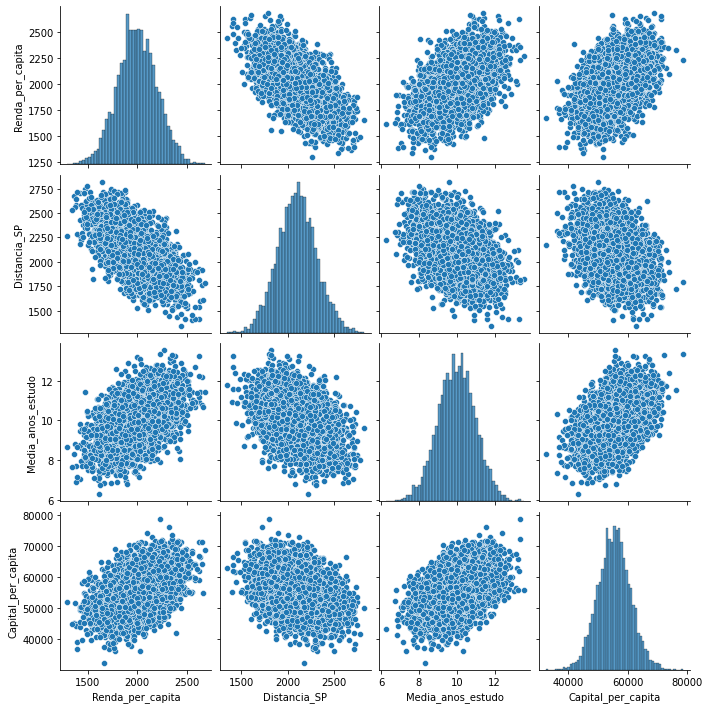

In [ ]:
## Análise visual da relação entre as variáveis que comporão o modelo (4.3)

# Visualização multipla do seaborn
sns.pairplot(base)

# Estratégia Empírica 

Estamos estimando um modelo do tipo Y = B0 +B1X1 + B2X2 + B3X3 + u, no qual Y representa a renda per capita de um município ( medida em reais), X1 é a distância do município até a cidade de São Paulo (medida em quilômetros), X2 é a média de anos de estudo daquele município ( medida em anos), X3 representa o nível de capital per capita daquele município (medido em reais), além de um termo de erro *u* que representa demais fatores que afetam Y.

 5.1) Fazemos algumas hipóteses subjacentes ao modelo, sendo elas:
 * Regressão linear em seus parâmetros: y = b0 +b1x1 + b2x2 + b3x3 + u
 * Amostra aleatória, ou seja, não cometemos viés de seleção.
 * Não há multicolinearidade perfeita: na amostra (e na população), nenhuma variável dependente é constante e não há relação perfeitamente linear entre as variáveis independentes.
 * Média condicional zero: E (u|x1, x2, x3) = 0 
  * As hipóteses listadas garantem que o estimador é não viesado, somadas a hipótese de homocedasticidade:
 * O erro u tem a mesma variância para qualquer valor das variáveis explicaticas.
  * Temos que os estimadores são BLUE, ou seja, os estimadores mais eficientes das classe dos não viesados.

5.2) As hipóteses de regressão linear, amostragem aleatória e não multicolinearidade são mais razoáveis por serem hipóteses mais 'fracas', uma vez que podemos construir o modelo para que ele seja assim. Já a hipótese de média nula é um pouco mais forte mas também é razoavel no contexto em questão. Basicamente estamos assumindo que o termo de erro possui apenas características que não possuem nenhuma correlação com as variáveis explicativas, como por exemplo, características geográficas de cada município. Além disso, a hipótese de homocedasticidade é forte, mas razoável dado q assumimos as outras, pois assumimos que o erro se mantém constante para qualquer valor das variáveis explicativas. 

#Estimação e Resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Renda_per_capita   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     3092.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:31:35   Log-Likelihood:                -35717.
No. Observations:                5500   AIC:                         7.144e+04
Df Residuals:                    5498   BIC:                         7.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3199.4964     21.687    147.533      0.000    3156.982    3242.011
Distancia_SP    -0.5714      0.010    -55.609      0.000      -0.592      -0.551
==============================================================================
Omnibus:                        2.028   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                2.026
Skew:                           0.027   Prob(JB):                        0.363
Kurtosis:                       2.923   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

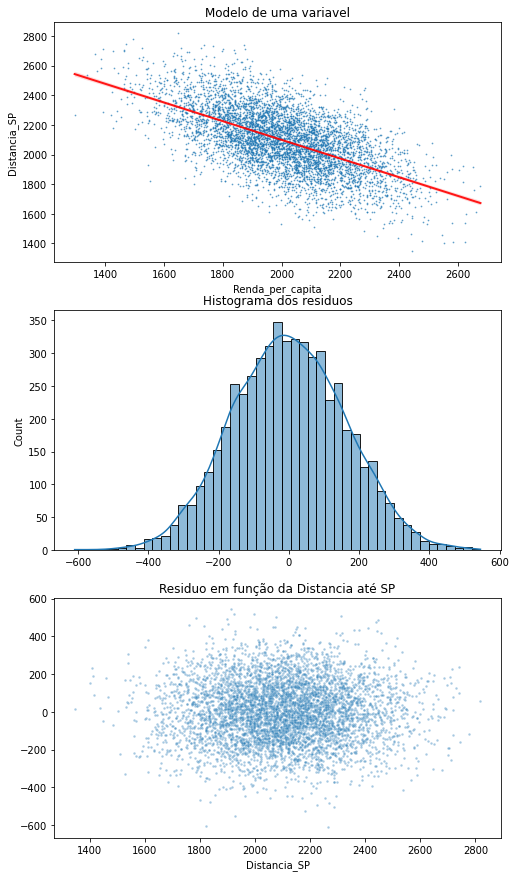

In [ ]:
## Estimação com variavel principal (6.1)

# Modelo
modelo_variavel_principal = ols('Renda_per_capita ~ Distancia_SP ',data=base).fit()

# Tabela de summary do modelo
display(modelo_variavel_principal.summary())

# Gráficos do modelo
fig,ax = plt.subplots(3,1,figsize=(8,15))

# Modelo linear
sns.regplot(x=base["Renda_per_capita"], y=base["Distancia_SP"], line_kws={"color":"r","alpha":0.9,"lw":2},scatter_kws={'alpha':0.6,'s':0.6}, ax=ax[0])
ax[0].title.set_text('Modelo de uma variavel')

# Histograma dos residuos
sns.histplot(modelo_variavel_principal.resid ,ax=ax[1],kde=True)
ax[1].title.set_text('Histograma dos residuos')

# Residuo em função da distancia até SP
sns.scatterplot(y=modelo_variavel_principal.resid , x = base['Distancia_SP'], ax=ax[2],alpha=0.4,s=5.9)
ax[2].title.set_text('Residuo em função da Distancia até SP')

**6.1) interpretando os resultados das regressões:**

Tendo em vista do gráficos apresentados acima, pode-se concluir a partir destes que quanto maior a distância entre uma cidade e São Paulo, menor será sua renda per capita. Nesse sentido, há também outros fatores que  influemciam a renda per capita do municipio, sendo eles o nível de estudo e o nível de capital per capita da cidade, onde, ao contrário da distância de são paulo, quanto maior eles, maior a renda per capita no municipio. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Renda_per_capita   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1615.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:31:35   Log-Likelihood:                -35206.
No. Observations:                5500   AIC:                         7.042e+04
Df Residuals:                    5496   BIC:                         7.045e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2008.0288     40.693     49.346      0.000    1928.254    2087.803
Distancia_SP          -0.4158      0.010    -39.774      0.000      -0.436      -0.395
Media_anos_estudo     48.2642      2.290     21.074      0.000      43.774      52.754
Capital_per_capita     0.0069      0.000     17.050      0.000       0.006       0.008
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.779
Skew:                           0.013   Prob(JB):                        0.411
Kurtosis:                       2.916   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

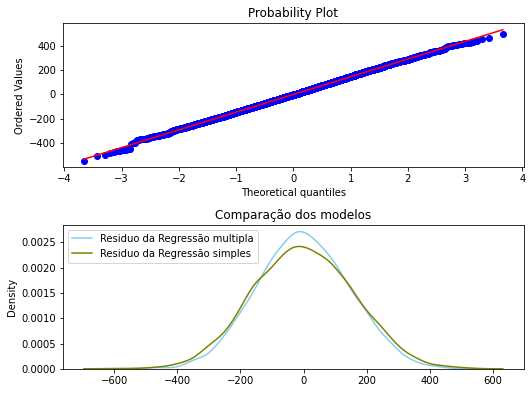

In [ ]:
## Estimação com regressão múltipla (6.2.1)

# Modelo
modelo_multiplo = ols('Renda_per_capita ~ Distancia_SP + Media_anos_estudo + Capital_per_capita ',data=base).fit()

# Tabela de summary do modelo
display(modelo_multiplo.summary())

# Gráficos do modelo
fig,ax=plt.subplots(2,1,figsize=(8,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



# Histograma dos residuos
res = stats.probplot(modelo_multiplo.resid, dist='norm', plot=ax[0])

# Comparação dos erros com o modelo anterior

sns.kdeplot(x=modelo_multiplo.resid, color="skyblue", ax=ax[1],label="Residuo da Regressão multipla")
sns.kdeplot( x=modelo_variavel_principal.resid, color="olive", ax=ax[1],label= "Residuo da Regressão simples")
ax[1].title.set_text("Comparação dos modelos")

plt.legend()
plt.show()


**6.2.1) interpretando os resultados das regressões:**

Tendo em vista propriedades da OLS e propriedades da distribuição dos dados da nossa base de dados conseguimos observar que o residuo final segue distribuição Normal e com p valores confortaveis conseguimos observar que as variaveis escolhidas como explicativas possuem betas de sinais esperados quanto se tratando do efeito delas na variavel objetivo. Média de anos de estudo, assim como nível de capital per capita, possui efeito positivo sobre a renda esperada para um municipio, já a distância de um municipio da capital de SP possui efeito negativo na estimação da renda per capita esperada.
Mais especificamente sobre o beta do efeito que a distancia até São Paulo causa na renda esperada de um municipio, podemos dizer que ele reduziu um pouco, o que pode indicar que o modelo anterior cometia leve erro de variavel omitida.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Renda_per_capita   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     1594.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:31:36   Log-Likelihood:                 6515.7
No. Observations:                5500   AIC:                        -1.302e+04
Df Residuals:                    5496   BIC:                        -1.300e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.2723      0.161     51.251      0.000       7.956       8.589
Distancia_SP          -0.4336      0.011    -39.435      0.000      -0.455      -0.412
Media_anos_estudo      0.2431      0.011     21.238      0.000       0.221       0.266
Capital_per_capita     0.1904      0.011     16.989      0.000       0.168       0.212
==============================================================================
Omnibus:                       44.286   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.194
Skew:                          -0.216   Prob(JB):                     1.54e-10
Kurtosis:                       3.100   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


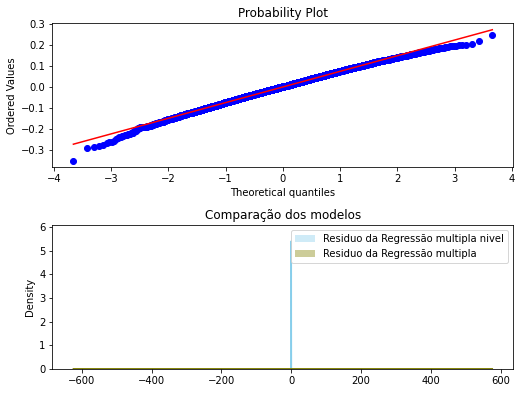

In [ ]:
## Estimação com regressão múltipla (6.2.2)

# Função transformadora de nivel t-> log normal:
def ln_(data_1):
    data = copy.deepcopy(data_1)
    for i in data.columns:
        data[i]= data[i].apply(lambda x: np.log(float(x)))
    return data

# Base logaritimica
base_ln = ln_(base)

# Modelo
modelo_multiplo_log = ols('Renda_per_capita ~ Distancia_SP + Media_anos_estudo + Capital_per_capita ',data=base_ln).fit()

# Tabela de summary do modelo
display(modelo_multiplo_log.summary())

# Gráficos do modelo
fig,ax=plt.subplots(2,1,figsize=(8,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



# Histograma dos residuos
res = stats.probplot(modelo_multiplo_log.resid, dist='norm', plot=ax[0])

# Comparação dos erros com o modelo anterior

sns.distplot(x=modelo_multiplo_log.resid, color="skyblue", ax=ax[1],label="Residuo da Regressão multipla nivel")
sns.distplot( x=modelo_multiplo.resid, color="olive", ax=ax[1],label= "Residuo da Regressão multipla")
ax[1].title.set_text("Comparação dos modelos")

plt.legend()
plt.show()


**6.2.2) interpretando os resultados das regressões:**

Observando as váriaveis da estimação percebemos que como esperado a proporção dos valores entre os beta e os seus sinais não ia diferir muito frente aos valores encontrado nas regressões nivel-nivel realizada anteriormente. Além disso, pela mudança da proporção das varaiveis do modelo observamos na distribuição do residuo do modelo que os erros ficam concentrados em uma faixa de valores ridiculamente menor, veja é só pensar que caso o residuo de um modelo log for de 200, isso quer dizer que você estimou uma resposta 200 vezes diferente da original o que por si só é muito improvavel.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Renda_per_capita   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1615.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:31:36   Log-Likelihood:                -6065.6
No. Observations:                5500   AIC:                         1.214e+04
Df Residuals:                    5496   BIC:                         1.217e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.429e-16      0.010   2.47e-14      1.000      -0.019       0.019
Distancia_SP          -0.4366      0.011    -39.774      0.000      -0.458      -0.415
Media_anos_estudo      0.2413      0.011     21.074      0.000       0.219       0.264
Capital_per_capita     0.1910      0.011     17.050      0.000       0.169       0.213
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.779
Skew:                           0.013   Prob(JB):                        0.411
Kurtosis:                       2.916   Cond. No.                         1.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


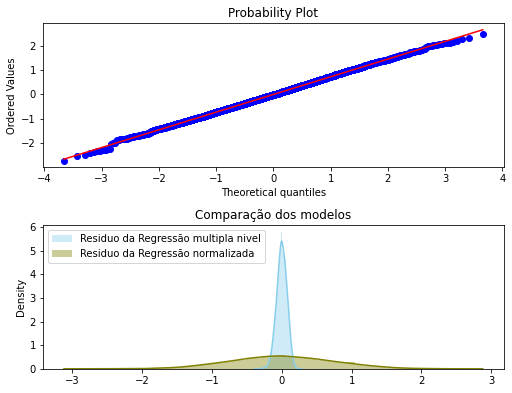

In [ ]:
## Estimação com regressão múltipla (6.2.3)

# Função transformadora de variavel -> variavel normalizada:
def normal_(data_1):
    data = copy.deepcopy(data_1)
    for i in data.columns:
        data[i]= (data[i]-data[i].mean()) / np.std(data[i])
    return data

# Base logaritimica
base_normal = normal_(base)

# Modelo
modelo_multiplo_normal = ols('Renda_per_capita ~ Distancia_SP + Media_anos_estudo + Capital_per_capita ',data=base_normal).fit()

# Tabela de summary do modelo
display(modelo_multiplo_normal.summary())

# Gráficos do modelo
fig,ax=plt.subplots(2,1,figsize=(8,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



# Histograma dos residuos
res = stats.probplot(modelo_multiplo_normal.resid, dist='norm', plot=ax[0])

# Comparação dos erros com o modelo anterior

sns.distplot(x=modelo_multiplo_log.resid, color="skyblue", ax=ax[1],label="Residuo da Regressão multipla nivel")
sns.distplot( x=modelo_multiplo_normal.resid, color="olive", ax=ax[1],label= "Residuo da Regressão normalizada")
ax[1].title.set_text("Comparação dos modelos")

plt.legend()
plt.show()


**6.2.3) interpretando os resultados das regressões:**

Agora que normalizamos as variaveis, o efeito de ter uma variavel com escala muito grande ou escala muito pequena não impacta mais na proporção entre os betas do modelo e sobre esse novo resultado limpo sem o ruido da escala conseguimos observar que a variavel mais expressiva para o nosso modelo é a Distância do municipio até a Capital.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Renda_per_capita   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1211.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:50:35   Log-Likelihood:                -35206.
No. Observations:                5500   AIC:                         7.042e+04
Df Residuals:                    5495   BIC:                         7.046e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1973.5015    183.263     10.769      0.000    1614.234    2332.769
Distancia_SP                      -0.3994      0.085     -4.673      0.000      -0.567      -0.232
Media_anos_estudo                 51.7204     18.033      2.868      0.004      16.369      87.072
Distancia_SP:Media_anos_estudo    -0.0016      0.009     -0.193      0.847      -0.018       0.015
Capital_per_capita                 0.0069      0.000     17.047      0.000       0.006       0.008
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.779
Skew:                           0.013   Prob(JB):                        0.411
Kurtosis:                       2.916   Cond. No.                     5.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


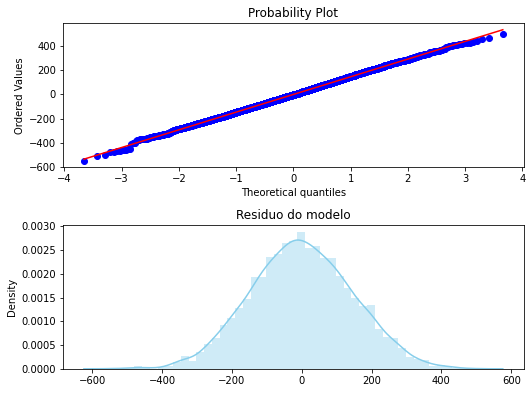

In [ ]:
## Estimação com regressão múltipla (6.3)


# Modelo
modelo_multiplo_2 = ols('Renda_per_capita ~ Distancia_SP * Media_anos_estudo + Capital_per_capita ',data=base).fit()

# Tabela de summary do modelo
display(modelo_multiplo_2.summary())

# Gráficos do modelo
fig,ax=plt.subplots(2,1,figsize=(8,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



# Histograma dos residuos
res = stats.probplot(modelo_multiplo_2.resid, dist='norm', plot=ax[0])

# Comparação dos erros com o modelo anterior

sns.distplot(x=modelo_multiplo_2.resid, color="skyblue", ax=ax[1],label="Residuo da Regressão multipla nivel")
ax[1].title.set_text("Residuo do modelo")

plt.show()


6.3) A fim de modificar o modelo 6.2, de modo a permitir que o efeito de X1 (Distancia_SP) sobre Y (Renda_per_capita) dependa de um X2 (Media_anos_estudo), foi estimada uma regressão múltipla através de MQO e então comparamos os erros do atual modelo com o anterior. Com o objetivo de estimar o novo efeito de Distância_SP sobre Renda_per_capita, devemos derivar Renda_per_capita em função de Distância_SP. Dessa forma, Observamos que o efeito de Distância_SP passa a ser -0.3994 -0.0016*Media_anos_estudo sobre Renda_per_capita, com a influência de Media_anos_estudo, ou seja, para cada aumento de uma unidade de Distância_SP, Renda_per_capita varia em -0.3994 -0.0016*Media_anos_estudo no novo modelo. Logo, pode-se dizer que o retorno marginal por ano a mais de estudo é crescente quanto mais perto dos grandes centros o indivíduo se encontra.

In [ ]:
## Teste white para o modelo 6.2 (Exercicio 6.4)

base['Residuo'] = modelo_multiplo.resid

teste_white = ols('Residuo ~  Distancia_SP * Media_anos_estudo * Capital_per_capita',data=base).fit()
teste_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Residuo   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.044
Date:                Thu, 16 Jun 2022   Prob (F-statistic):              0.398
Time:                        19:34:24   Log-Likelihood:                -35202.
No. Observations:                5500   AIC:                         7.042e+04
Df Residuals:                    5492   BIC:                         7.047e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -4166.3341   1584.631     -2.629      0.009   -7272.838   -1059.830
Distancia_SP                                          1.9778      0.736      2.686      0.007       0.534       3.421
Media_anos_estudo                                   418.8433    157.813      2.654      0.008     109.467     728.219
Distancia_SP:Media_anos_estudo                       -0.1997      0.074     -2.691      0.007      -0.345      -0.054
Capital_per_capita                                    0.0750      0.029      2.627      0.009       0.019       0.131
Distancia_SP:Capital_per_capita                   -3.573e-05   1.34e-05     -2.670      0.008    -6.2e-05    -9.5e-06
Media_anos_estudo:Capital_per_capita                 -0.0075      0.003     -2.672      0.008      -0.013      -0.002
Distancia_SP:Media_anos_estudo:Capital_per_capita  3.591e-06   1.33e-06      2.696      0.007     9.8e-07     6.2e-06
==============================================================================
Omnibus:                        1.981   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.934
Skew:                           0.010   Prob(JB):                        0.380
Kurtosis:                       2.910   Cond. No.                     9.57e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

6.4) Para testar a presença de heteroscedasticidade nos erros no modelo 6.2, realizamos o Teste White, que corresponde a estimar uˆ2 = δ0 + δ1x1 + δ2x2 + δ3x3 + δ4x1ˆ2 + δ5x2ˆ2 + δ6x3ˆ2 + δ7x1x2 + δ8x2x3 + δ9x1x3 + erro, após a feita a estimação do modelo inicial a fim de se obter os resíduos. Feito isso, utilizamos o teste F para testar a hipótese de que todos os coeficientes sejam 0. Dessa forma, observamos que Rˆ2 é 0 e por consequência, F < c através do teste de significância global, de modo que não rejeita a hipótese nula e nos mostra que há heteroscedasticidade, visto que o erro ao quadrado não é correlacionado com as variáveis independentes, seus quadrados e produtos.

6.5)
6.5.1) Em uma situação de informações faltantes na amostra de interesse, há a possibilidade da informação ser distribuída na ragressão, de modo que não tem impacto significativo sobre a mesma, mantendo a consistência e inviés do modelo. Porém, caso tal fato não ocorra, pode existir um problema de endogeneidade, de maneira que informações faltantes causam um aumento na variância da regressão, promovendo inconsistência e viés. Dito isso, a fim de mitigar o problema, devemos buscar outra forma de regressão que excluísse a perda ou adcionamos uma variável proxy para substituir uma perda de difícil mensuração. Poderíamos também encontrar novos dados para utilizarmos a mesma regressão.

6.5.2) Um erro de medida em uma das variáveis explicativas prejudica o estimador MQO que se torna inconsistente e viesado. Com isso,para que não haja erro de medida é preciso coletar dados de maneira eficiente, ou seja, aqueles que afetam verdadeiramente o comportamento econômico analizado.  

6.5.3) No caso de um problema de variável omitida na regressão, onde não podemos coletar uma boa proxy,podemos ter duas situações, quando há correlação e quando não há (não prejudica o modelo). Quando há correlação entre a variável omitida e uma variável explicativa, temos um problema de endogeneidade que provoca a inconsistência e viés dos estimadores. Ademais, de modo geral, o erro quadrático aumenta e o Rˆ2 diminui, tornando o modelo menos eficiente. Dessa forma, a fim de aliviar o problema da endogeneidade causada pela variável omitida, podemos utilizar variáveis instrumentais, ou seja, adcionamos um instrumento z que obedeça a hipótese da exogeneidade (cov(z,u)=0) e da relevância (cov(z,x)≠0) de modo que z enquanto variável exógena é algo que está dentro de x mas que não afeta Y diretamente.

In [ ]:
### Variavel  indicadora com probit e logit (6.6)

# Criando a variavel indicador
base['Rico'] =( base['Renda_per_capita'] >  base['Renda_per_capita'].mean() ) * 1 + 0

# Arrumando as variaveis
y= base['Rico'].values.reshape(-1,1)
x= base[['Distancia_SP', 'Media_anos_estudo','Capital_per_capita']]
x= sm.add_constant(x).astype(float)




Optimization terminated successfully.
         Current function value: 0.508588
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                   Rico   No. Observations:                 5500
Model:                         Probit   Df Residuals:                     5496
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                  0.2662
Time:                        22:10:17   Log-Likelihood:                -2797.2
converged:                       True   LL-Null:                       -3811.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1876      0.399     -0.470      0.638      -0.970       0.594
Dista

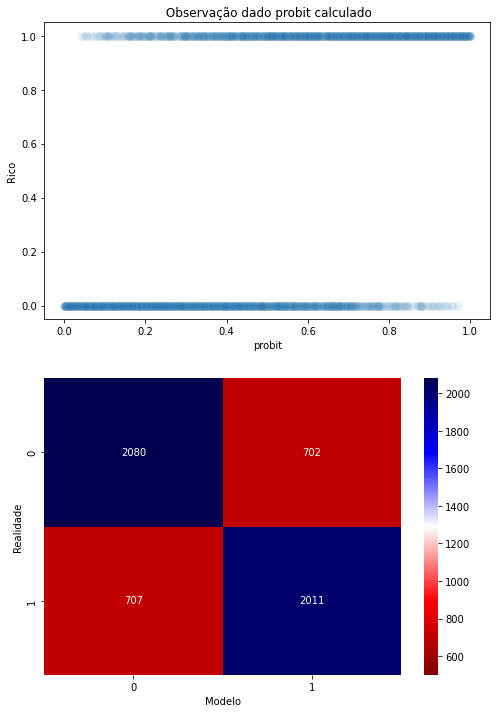

In [ ]:
## 6.6.1 (probit):

# Modelo
model = probit('Rico ~ Distancia_SP + Media_anos_estudo + Capital_per_capita',data=base)
probit_model = model.fit()

#Adicionano predict do modelo na base
base['probit'] = probit_model.predict(x)  #Geralmente usamos FittedValues, mas parece que essa função esta com bugs (alguns valores foram maiores que 1), então substituimos por 

# Sumario
print(probit_model.summary())


# Gráficos

fig, ax =plt.subplots(2,1,figsize=(8,12))

sns.scatterplot(y=base['Rico'],x=base['probit'],alpha=0.04,s=80, ax=ax[0])
ax[0].title.set_text(" Observação dado probit calculado")


matriz_probit = confusion_matrix(base['probit']>.5,base['Rico'] )
s=sns.heatmap(matriz_probit,cmap='seismic_r',annot=True,vmin=500,fmt=".0f")
s=s.set(xlabel="Modelo" , ylabel= "Realidade")


Optimization terminated successfully.
         Current function value: 0.509022
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Rico   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5496
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                  0.2655
Time:                        22:12:12   Log-Likelihood:                -2799.6
converged:                       True   LL-Null:                       -3811.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3431      0.678     -0.506      0.613      -1.672       0.985
Dista

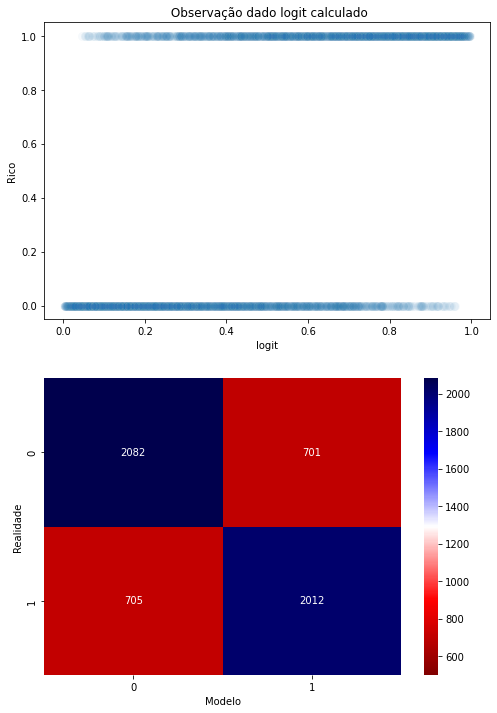

In [ ]:
## 6.6.2 (logit):

# Modelo
model = logit('Rico ~ Distancia_SP + Media_anos_estudo + Capital_per_capita',data=base)
logit_model = model.fit()

#Adicionano predict do modelo na base
base['logit'] = logit_model.predict(x)  #Geralmente usamos FittedValues, mas parece que essa função esta com bugs (alguns valores foram maiores que 1), então substituimos por 

# Sumario
print(logit_model.summary())


# Gráficos

fig, ax =plt.subplots(2,1,figsize=(8,12))

sns.scatterplot(y=base['Rico'],x=base['logit'],alpha=0.04,s=80, ax=ax[0])
ax[0].title.set_text(" Observação dado logit calculado")


matriz_logit = confusion_matrix(base['logit']>.5,base['Rico'] )
s=sns.heatmap(matriz_logit,cmap='seismic_r',annot=True,vmin=500,fmt=".0f")
s=s.set(xlabel="Modelo" , ylabel= "Realidade")


**(Interpretação dos Parâmetros)**

Nesse exercício, consideramos como variável dummy o fator de um município ser "Rico", assumindo valor 1 quando positivo. 

Assim, os parâmetros, seja na estimação do modelo via probit, seja via logit, possuem resultados e comportamentos muito parecidos, sendo os próprios modelos também muito próximos. 

Dessa forma, para ambas as metodologias, concluímos: 



1.   Quanto mais longe de São Paulo, menor é a probabilidade de um município ser rico (ótica do parâmetro "Distancia_SP");
2.   Quanto maior a média de anos de estudo da população (parâmetro "Media_anos_estudo"), maior é a probabilidade de um município ser rico.


Ambos os resultados estão em linha com nossas hipóteses iniciais. 

### 6.7. Variável Instrumental 

6.7.1) Para que seja possível estimar de forma não viesada e consistente  o parâmetro de interesse, devemos definir Z, como um variável instrumental de modo que:
* Cov(Z,u) = 0 , isso nos garante que nossa variável não possui relação com o termo de erro, e portanto não temos problema de endogeneidade.
* Cov(Z,X) $\neq$ 0, essa é a hipótese que nos garante que o instrumento possui alguma relevância para servir como instrumento de X. 

6.7.2) Suponha que não seja possível, por algum motivo, inferir que  a média de anos de estudo é exógena. Poderíamos então usar Z, representando o gasto em educação,como uma VI para essa variável. Podemos argumentar que Z não possui correlação com o termo de erro, que possui características físicas dos municípios como clima, extensão territorial, etc. Além disso, é clara a relação que existe entre o gasto com educação e a média de anos de estudo de um determinado local. Assim sendo, Z poderia ser nossa variável instrumental. 

6.7.3) No exemplo dado no item acima temos que Z é VI para X2. Logo, primeiro fazemos um regressão na qual X2 é nossa variável dependente, desse modo:
X2= B0 + B1Z + u , estimamos essa regressão obtendo X2* , BO* e B1* , após isso voltamos a regressão original substituindo X2 por X2* , assim teremos:
Y= B0 + B1X1 + B2X2* + B3X3 + u, e por fim, seguindo MQ2E, calculamos essa regressão para achar Y* . 

### 6.8. Painel de Dados 

Uma vez que passamos a considerar a utilização de dados em painél ao invés de um modelo cross-section, temos algumas vantagens como:


  1.   Maior quantidade de observações que podem ser utilizadas no modelo;
  1.   Maior variabilidade dos dados;
  1.   Redução da possibilidade de multicolinearidade;
  1.   Redução do impacto do problema de variável omitida por meio do modelo de efeitos fixos; e etc. 

Dessa forma, uma vez que o assunto por nós proposto é complexo e recebe a influência de diversas variáveis, uma das maneiras de adaptar o modelo para melhor aproveitar a estrutura de painél de dados é:

Se utilizar do princípio 4) e adicionar o controle de efeitos fixos, a fim de reduzir a influência de efeitos não observados anteriormente, isolando qualquer heterogeneidade entre os diferentes estados eeliminando o viés da variável omitida.
Na prática, podemos adicionar em nosso modelo um controle para reajustes salariais, que impactam diretamente na renda per capita, ou para o número da População Economicamente Ativa de um município.
Com essa mudança, a tendência é que tenhamos um aumento no R². O argumento pode ser estatisticamente testado com a realização de um teste F. 


#### 6.9. Estimativa de Efeito Causal

A partir dos conceitos aprendidos em sala de aula ao longo do semestre, escolhemos a estatística F como indicador principal para a escolha do melhor resultado para estimativa do efeito causal de X1 sobre Y.

A escolha desse indicador se deu pelo fato de a estatística F ser a ponderação entre a capacidade de o modelo entregar uma boa resposta e a quantidade de variáveis nele presente.

Dessa forma, vemos que o modelo proposto no item 6.1 - que explica a Renda per Capita pela distância até São Paulo - apesar de apresentar a maior estatística F, com um valor de 3092, ainda está cometendo erro de variavel omitida, por isso vamos escolher o nivel-nivel, dentre os modelos que estão utilizando todas as variaveis, este é o que possui melhor r² e dada as dimensões do modelo também é o que acaba possuindo a maior estatistica f observada.

# Conclusão

Com a realização do trabalho, foi concluído que é possível testar de forma técnica hipóteses utilizadas em modelos econômicos e seus resultados, como também conseguimos observar de maneira mais clara a forma com a qual as variáveis observadas podem explicar a riqueza de uma economia, da mesma forma que aprendemos isso em diversos outros modelos ao longo do curso. O grupo particularmente considera importante e proveitoso essa oportunidade de colocar em prática o estudo da economia de um campo menos teórico e mais aplicado. 


# Referências

Artigos

*   https://www.revistaaber.org.br/rberu/article/view/165/174
*   http://www.repositorio.jesuita.org.br/bitstream/handle/UNISINOS/3055/estimativas_volume.pdf?sequence=1&isAllowed=y
*   https://www.scielo.br/j/ecoa/a/zqDqP4CzjkgcnzcS4hCms6D/?format=pdf&lang=pt




*   [IPEA](http://www.ipeadata.gov.br/Default.aspx)



*   [IBGE](https://groups.google.com/g/qgisbrasil/c/0kJDo2KH0is?pli=1 )

